In [24]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
 
from sklearn import datasets 
from sklearn import manifold
from sklearn.datasets import fetch_openml


In [25]:
# Replace 'mnist.csv' with the actual path to your CSV file
mnist_df = pd.read_csv('mnist_784.csv')


In [27]:
pixel_values = mnist_df.drop(columns=['class'])  # Features (pixel values)
targets  = mnist_df['class']  # Labels (digit values)


In [28]:
targets = targets.astype(int) 

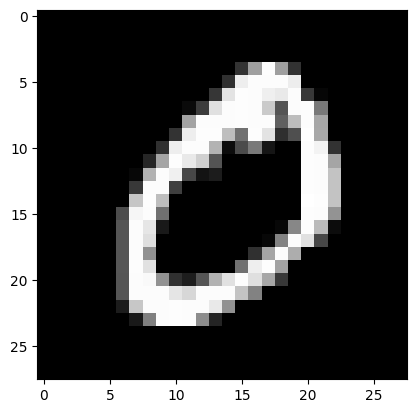

In [38]:
single_image = pixel_values.iloc[1].values.reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [40]:
tsne = manifold.TSNE(n_components=2, random_state=42) 

pixel_values_array = pixel_values.to_numpy()

transformed_data = tsne.fit_transform(pixel_values_array[:3000, :])


c:\Users\lia68085\AppData\Local\anaconda3\envs\ML1\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\lia68085\AppData\Local\anaconda3\envs\ML1\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [41]:
tsne_df = pd.DataFrame( 
    np.column_stack((transformed_data, targets[:3000])),  
    columns=["x", "y", "targets"] 
) 
 
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [44]:
tsne_df.head(10)

,x,y,targets
0,23.203314,-17.619217,5
1,7.989185,-67.105774,0
2,50.110378,39.364567,4
3,-37.374588,31.809721,1
4,23.049948,33.583393,9
5,-19.747002,4.665139,2
6,-59.887478,-8.998437,1
7,37.657616,-27.392725,3
8,-54.670567,-5.580581,1
9,2.958270,31.583323,4


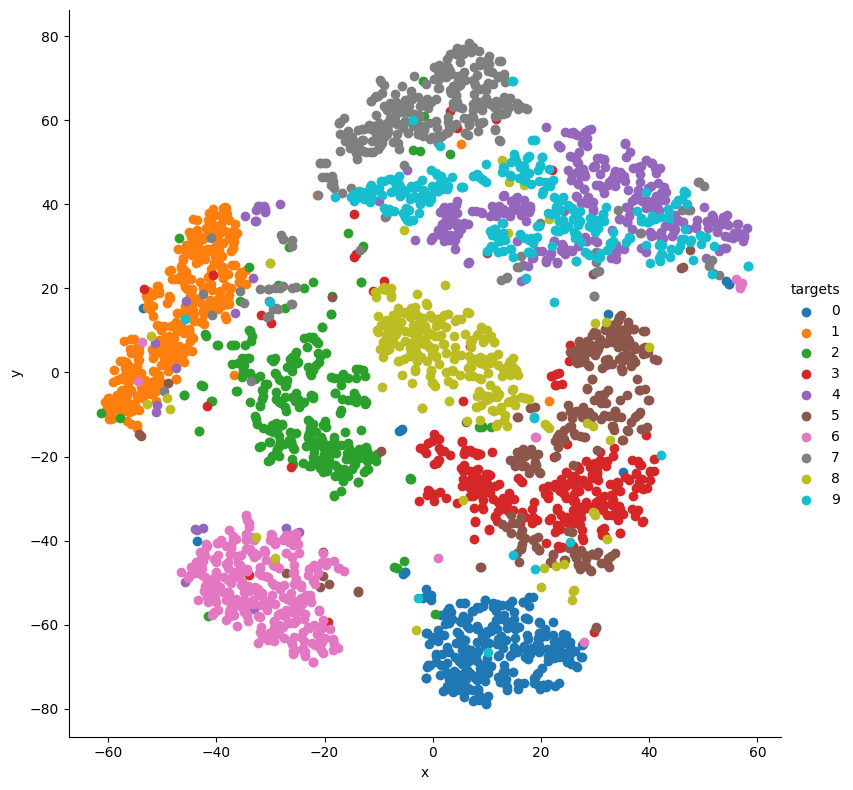

In [46]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
 
grid.map(plt.scatter, "x", "y").add_legend() 

In [ ]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()


## Cross-validation

import pandas as pd 
df = pd.read_csv("winequality-red.csv")